In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output


import xobjects as xo
import xtrack as xt
import xpart as xp

#============================
from xdeps.refs import ARef
import rich
import re


class RenderingKnobs(object):   
    def __init__(self, my_dict):
        for key in my_dict.keys():
            setattr(self, key, my_dict[key])

def knobs(self,):
    _fields = self._value._fields
    
    sub_knobs   = []
    print_names = {}
    for key in _fields:
        _expr = self[key]._expr
        if _expr is None:
            print_names[key] = None
        else:
            print_names[key] = str(_expr)

        matches    = re.findall(r"[^[]*\[([^]]*)\]", str(_expr))
        sub_knobs += [m[1:-1] for m in matches]

    print_values = {}
    for _var in list(set(sub_knobs)):
        print_values[f"'{_var}'"] = tracker.vars[_var]._value

    printable = {**print_values,**{ 30*'-': 30*'-'},**print_names}

    rich.inspect(RenderingKnobs(printable),title=str(self._value), docs=False)
    return list(set(sub_knobs))


def inspect(self,**kwargs):
    return rich.inspect(self._value,**kwargs)

ARef.inspect = inspect
ARef.knobs = knobs
#============================

fname_line_particles= '../Data/Lines/line_lhcb1.json'
with open(fname_line_particles, 'r') as fid:
    input_data = json.load(fid)
line = xt.Line.from_dict(input_data)
line.particle_ref = xp.Particles.from_dict(input_data['particle_on_tracker_co'])


# Tracker and twiss
#===================
tracker = xt.Tracker(line=line)
xtwiss  = tracker.twiss()

df_columns = ['name', 's', 'x', 'px', 'y', 'py', 'zeta', 'delta', 'ptau', 'betx', 'bety', 'alfx', 'alfy', 'gamx', 'gamy', 'dx', 'dpx', 'dy', 'dpy', 'mux', 'muy', 'qx', 'qy', 'qs', 'dqx', 'dqy']
twiss      = pd.DataFrame(xtwiss,columns = df_columns)
twiss.set_index('name',inplace=True)

clear_output(wait=False)

In [2]:
bb    = twiss.loc[twiss.index.str.contains('bb_')]
wires = twiss.loc[twiss.index.str.contains('bbcw')]

In [6]:
tracker.element_refs[bb.index[0]].inspect()

╭───────────────────── <class 'xfields.beam_elements.beambeam2d.BeamBeamBiGaussian2D'> ─────────────────────╮
│ ╭───────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <xfields.beam_elements.beambeam2d.BeamBeamBiGaussian2D object at 0x7fd3e6978fa0>                      │ │
│ ╰───────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                           │
│                    beta0 = 0.9999999904805956                                                             │
│                     d_px = -8.161596717808973e-10                                                         │
│                     d_py = 8.319923711453409e-15                                                          │
│            extra_sources = NameError('`extra_sources` has been removed. Use `_extra_c_sources` instead.') │
│             iscollective = None                                                                           │
│                   mean_x = 0.05332313067507262                                                            │
│                   mean_y = 2.668940420391888e-06                                                          │
│           min_sigma_diff = 1e-10                                                                          │
│              n_particles = 110000000000.0                                                                 │
│         other_beam_beta0 = 0.9999999904805956                                                             │
│ other_beam_num_particles = 110000000000.0                                                                 │
│            other_beam_q0 = 1.0                                                                            │
│       other_beam_shift_x = 0.05332313067507262                                                            │
│       other_beam_shift_y = 2.668940420391888e-06                                                          │
│      other_beam_Sigma_11 = 1.34774168435387e-06                                                           │
│      other_beam_Sigma_13 = 0.0                                                                            │
│      other_beam_Sigma_33 = 1.0562958345980142e-06                                                         │
│         post_subtract_px = -8.161596717808973e-10                                                         │
│         post_subtract_py = 8.319923711453409e-15                                                          │
│                       q0 = 1.0                                                                            │
│              ref_shift_x = 0.0                                                                            │
│              ref_shift_y = 0.0                                                                            │
│                  sigma_x = 0.001160922772777703                                                           │
│                  sigma_y = 0.0010277625380398015                                                          │
│                 XoStruct = NameError('`XoStruct` has been removed. Use `_XoStruct` instead.')             │
╰───────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [11]:
sub_knobs = tracker.element_refs[wires.index[0]].knobs()

╭──── <xtrack.beam_elements.elements.Wire object at 0x7fd3e6976760> ────╮
│ ╭───────────────────────────────────────────────────────────────────╮ │
│ │ <__main__.RenderingKnobs object at 0x7fd3da731e50>                │ │
│ ╰───────────────────────────────────────────────────────────────────╯ │
│                                                                       │
│         'bbcwe_current.4l5.b1' = 0.0                                  │
│           'bbcwe_xma.4l5.u.b1' = 0.9979225245831763                   │
│           'bbcwe_yma.4l5.u.b1' = 1.612292592790771e-07                │
│ ------------------------------ = '------------------------------'     │
│                        current = "(vars['bbcwe_current.4l5.b1']/2.0)" │
│                          L_int = None                                 │
│                          L_phy = None                                 │
│               post_subtract_px = None                                 │
│               post_subtract_py = None                                 │
│                            xma = "vars['bbcwe_xma.4l5.u.b1']"         │
│                            yma = "vars['bbcwe_yma.4l5.u.b1']"         │
╰───────────────────────────────────────────────────────────────────────╯

In [14]:
tracker.vars[sub_knobs[0]].knobs()

AttributeError: 'float' object has no attribute '_fields'

In [16]:
tracker.vars[sub_knobs[0]].inspect()

╭────────────────────────── <class 'float'> ──────────────────────────╮
│ Convert a string or number to a floating point number, if possible. │
│                                                                     │
│ ╭─────────────────────────────────────────────────────────────────╮ │
│ │ 0.0                                                             │ │
│ ╰─────────────────────────────────────────────────────────────────╯ │
│                                                                     │
│ imag = 0.0                                                          │
│ real = 0.0                                                          │
╰─────────────────────────────────────────────────────────────────────╯

In [134]:
tracker.element_refs[wires.index[0]].current._expr

(vars['bbcwe_current.4l5.b1']/2.0)

In [135]:
tracker.vars['bbcwe_current.4l5.b1']._info()

#  vars['bbcwe_current.4l5.b1']._get_value()
   vars['bbcwe_current.4l5.b1'] = 350.0

#  vars['bbcwe_current.4l5.b1']._expr
   vars['bbcwe_current.4l5.b1'] = vars['bbcw_i_ip5.b1']

#  vars['bbcwe_current.4l5.b1']._expr._get_dependencies()
   vars['bbcw_i_ip5.b1'] = 350.0

#  vars['bbcwe_current.4l5.b1']._find_dependant_targets()
   element_refs['bbcwe_wire.4l5.d.b1'].current
   element_refs['bbcwe_wire.4l5.u.b1'].current



In [139]:
import rich

In [142]:
rich.inspect(rich.inspect)

╭───────────────────────────────────── <function inspect at 0x7f4eccfe4b80> ──────────────────────────────────────╮
│ def inspect(obj: Any, *, console: Optional[ForwardRef('Console')] = None, title: Optional[str] = None, help:    │
│ bool = False, methods: bool = False, docs: bool = True, private: bool = False, dunder: bool = False, sort: bool │
│ = True, all: bool = False, value: bool = True) -> None:                                                         │
│                                                                                                                 │
│ Inspect any Python object.                                                                                      │
│                                                                                                                 │
│ * inspect(<OBJECT>) to see summarized info.                                                                     │
│ * inspect(<OBJECT>, methods=True) to see methods.                                                               │
│ * inspect(<OBJECT>, help=True) to see full (non-abbreviated) help.                                              │
│ * inspect(<OBJECT>, private=True) to see private attributes (single underscore).                                │
│ * inspect(<OBJECT>, dunder=True) to see attributes beginning with double underscore.                            │
│ * inspect(<OBJECT>, all=True) to see all attributes.                                                            │
│                                                                                                                 │
│ Args:                                                                                                           │
│     obj (Any): An object to inspect.                                                                            │
│     title (str, optional): Title to display over inspect result, or None use type. Defaults to None.            │
│     help (bool, optional): Show full help text rather than just first paragraph. Defaults to False.             │
│     methods (bool, optional): Enable inspection of callables. Defaults to False.                                │
│     docs (bool, optional): Also render doc strings. Defaults to True.                                           │
│     private (bool, optional): Show private attributes (beginning with underscore). Defaults to False.           │
│     dunder (bool, optional): Show attributes starting with double underscore. Defaults to False.                │
│     sort (bool, optional): Sort attributes alphabetically. Defaults to True.                                    │
│     all (bool, optional): Show all attributes. Defaults to False.                                               │
│     value (bool, optional): Pretty print value. Defaults to True.                                               │
│                                                                                                                 │
│ 35 attribute(s) not shown. Run inspect(inspect) for options.                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [77]:
inspect(inspect)

╭───────────────────────────────────── <function inspect at 0x7f4eccfe4b80> ──────────────────────────────────────╮
│ def inspect(obj: Any, *, console: Optional[ForwardRef('Console')] = None, title: Optional[str] = None, help:    │
│ bool = False, methods: bool = False, docs: bool = True, private: bool = False, dunder: bool = False, sort: bool │
│ = True, all: bool = False, value: bool = True) -> None:                                                         │
│                                                                                                                 │
│ Inspect any Python object.                                                                                      │
│                                                                                                                 │
│ * inspect(<OBJECT>) to see summarized info.                                                                     │
│ * inspect(<OBJECT>, methods=True) to see methods.                                                               │
│ * inspect(<OBJECT>, help=True) to see full (non-abbreviated) help.                                              │
│ * inspect(<OBJECT>, private=True) to see private attributes (single underscore).                                │
│ * inspect(<OBJECT>, dunder=True) to see attributes beginning with double underscore.                            │
│ * inspect(<OBJECT>, all=True) to see all attributes.                                                            │
│                                                                                                                 │
│ Args:                                                                                                           │
│     obj (Any): An object to inspect.                                                                            │
│     title (str, optional): Title to display over inspect result, or None use type. Defaults to None.            │
│     help (bool, optional): Show full help text rather than just first paragraph. Defaults to False.             │
│     methods (bool, optional): Enable inspection of callables. Defaults to False.                                │
│     docs (bool, optional): Also render doc strings. Defaults to True.                                           │
│     private (bool, optional): Show private attributes (beginning with underscore). Defaults to False.           │
│     dunder (bool, optional): Show attributes starting with double underscore. Defaults to False.                │
│     sort (bool, optional): Sort attributes alphabetically. Defaults to True.                                    │
│     all (bool, optional): Show all attributes. Defaults to False.                                               │
│     value (bool, optional): Pretty print value. Defaults to True.                                               │
│                                                                                                                 │
│ 35 attribute(s) not shown. Run inspect(inspect) for options.                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [25]:
tracker.element_refs['bb_lr.l5b1_24']._fields._value

['ref_shift_x',
 'ref_shift_y',
 'other_beam_shift_x',
 'other_beam_shift_y',
 'post_subtract_px',
 'post_subtract_py',
 'other_beam_q0',
 'other_beam_beta0',
 'other_beam_num_particles',
 'other_beam_Sigma_11',
 'other_beam_Sigma_13',
 'other_beam_Sigma_33',
 'min_sigma_diff']

In [13]:
tracker.element_refs['bb_lr.l5b1_24'].inspect()

╭───────────────────── <class 'xfields.beam_elements.beambeam2d.BeamBeamBiGaussian2D'> ─────────────────────╮
│ ╭───────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <xfields.beam_elements.beambeam2d.BeamBeamBiGaussian2D object at 0x7f31a4e75430>                      │ │
│ ╰───────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                           │
│                    beta0 = 0.9999999904805956                                                             │
│                     d_px = -9.512864770813267e-10                                                         │
│                     d_py = 1.1542021845846554e-14                                                         │
│            extra_sources = NameError('`extra_sources` has been removed. Use `_extra_c_sources` instead.') │
│             iscollective = None                                                                           │
│                   mean_x = 0.045103007821666624                                                           │
│                   mean_y = 2.7660195734916006e-06                                                         │
│           min_sigma_diff = 1e-10                                                                          │
│              n_particles = 110000000000.0                                                                 │
│         other_beam_beta0 = 0.9999999904805956                                                             │
│ other_beam_num_particles = 110000000000.0                                                                 │
│            other_beam_q0 = 1.0                                                                            │
│       other_beam_shift_x = 0.045103007821666624                                                           │
│       other_beam_shift_y = 2.7660195734916006e-06                                                         │
│      other_beam_Sigma_11 = 1.4395161113838154e-06                                                         │
│      other_beam_Sigma_13 = 0.0                                                                            │
│      other_beam_Sigma_33 = 1.0699171911390306e-06                                                         │
│         post_subtract_px = -9.512864770813267e-10                                                         │
│         post_subtract_py = 1.1542021845846554e-14                                                         │
│                       q0 = 1.0                                                                            │
│              ref_shift_x = 0.0                                                                            │
│              ref_shift_y = 0.0                                                                            │
│                  sigma_x = 0.0011997983628026067                                                          │
│                  sigma_y = 0.001034368015330632                                                           │
│                 XoStruct = NameError('`XoStruct` has been removed. Use `_XoStruct` instead.')             │
╰───────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [58]:
tracker.element_refs[wires.index[0]]._value._fields

['L_phy',
 'L_int',
 'current',
 'xma',
 'yma',
 'post_subtract_px',
 'post_subtract_py']

In [71]:
tracker.element_refs[wires.index[0]].inspect(all=True)

╭───────────────────────────────── <class 'xtrack.beam_elements.elements.Wire'> ──────────────────────────────────╮
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <xtrack.beam_elements.elements.Wire object at 0x7f31a4e71a30>                                               │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                                 │
│               _buffer = <BufferNumpy 2101592/7899392>                                                           │
│              _context = <xobjects.context_cpu.ContextCpu object at 0x7f3247a122e0>                              │
│               current = 0.0                                                                                     │
│           _depends_on = [<struct ParticlesData>]                                                                │
│              __dict__ = {'_xobject': WireData(...)}                                                             │
│               __doc__ = None                                                                                    │
│      _extra_c_sources = [                                                                                       │
│                             PosixPath('/home/phbelang/abp/BBStudies/Executables/py_BB/xtrack/xtrack/headers/co… │
│                             PosixPath('/home/phbelang/abp/BBStudies/Executables/py_BB/xtrack/xtrack/beam_eleme… │
│                             '\n            /*gpukern*/\n            void Wire_track_particles(\n                │
│                         WireData el,\n\n                             ParticlesData particles,\n\n               │
│                         int64_t flag_increment_at_element,\n                /*gpuglmem*/ int8_t* io_buffer){\n  │
│                         LocalParticle lpart;\n            lpart.io_buffer = io_buffer;\n\n            int64_t   │
│                         part_id = 0;                    //only_for_context cpu_serial cpu_openmp\n              │
│                         int64_t part_id = blockDim.x * blockIdx.x + threadIdx.x; //only_for_context cuda\n      │
│                         int64_t part_id = get_global_id(0);                    //only_for_context opencl\n\n    │
│                         int64_t part_capacity = ParticlesData_get__capacity(particles);\n            if         │
│                         (part_id<part_capacity){\n                Particles_to_LocalParticle(particles, &lpart, │
│                         part_id);\n                if (check_is_active(&lpart)>0){\n                            │
│                         Wire_track_local_particle(el, &lpart);\n\n                }\n                if         │
│                         (check_is_active(&lpart)>0 && flag_increment_at_element){\n                             │
│                         increment_at_element(&lpart);\n                }\n            }\n        }\n'           │
│                         ]                                                                                       │
│         extra_sources = NameError('`extra_sources` has been removed. Use `_extra_c_sources` instead.')          │
│               _fields = ['L_phy', 'L_int', 'current', 'xma', 'yma', 'post_subtract_px', 'post_subtract_py']     │
│       _inverse_rename = {}                                                                                      │
│          iscollective = None                                                                                    │
│              _kernels = {'Wire_track_particles': <xobjects.context.Kernel object at 0x7f31a63a0610>}            │
│                 L_int = 2.0                                                                                     │
│                 L_phy = 1.0                           

In [143]:


ARef.knobs = knobs

tracker.element_refs[wires.index[0]].knobs()
tracker.element_refs['bb_lr.l5b1_24'].knobs()

╭──── <xtrack.beam_elements.elements.Wire object at 0x7f31a4e71a30> ────╮
│ ╭───────────────────────────────────────────────────────────────────╮ │
│ │ <__main__.RenderingKnobs object at 0x7f323afef2e0>                │ │
│ ╰───────────────────────────────────────────────────────────────────╯ │
│                                                                       │
│         'bbcwe_current.4l5.b1' = 0.0                                  │
│           'bbcwe_xma.4l5.u.b1' = 0.9979225245831763                   │
│           'bbcwe_yma.4l5.u.b1' = 1.612292592790771e-07                │
│ ------------------------------ = '------------------------------'     │
│                        current = "(vars['bbcwe_current.4l5.b1']/2.0)" │
│                          L_int = None                                 │
│                          L_phy = None                                 │
│               post_subtract_px = None                                 │
│               post_subtract_py = None                                 │
│                            xma = "vars['bbcwe_xma.4l5.u.b1']"         │
│                            yma = "vars['bbcwe_yma.4l5.u.b1']"         │
╰───────────────────────────────────────────────────────────────────────╯

╭─ <xfields.beam_elements.beambeam2d.BeamBeamBiGaussian2D object at 0x7f31a4e75430> ─╮
│ ╭────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <__main__.RenderingKnobs object at 0x7f32336a4400>                             │ │
│ ╰────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                    │
│ ------------------------------ = '------------------------------'                  │
│                 min_sigma_diff = None                                              │
│               other_beam_beta0 = None                                              │
│       other_beam_num_particles = None                                              │
│                  other_beam_q0 = None                                              │
│             other_beam_shift_x = None                                              │
│             other_beam_shift_y = None                                              │
│            other_beam_Sigma_11 = None                                              │
│            other_beam_Sigma_13 = None                                              │
│            other_beam_Sigma_33 = None                                              │
│               post_subtract_px = None                                              │
│               post_subtract_py = None                                              │
│                    ref_shift_x = None                                              │
│                    ref_shift_y = None                                              │
╰────────────────────────────────────────────────────────────────────────────────────╯

[]

'<xtrack.beam_elements.elements.Wire object at 0x7f31a4e71a30>'

In [138]:
tracker.element_refs[wires.index[0]].inspect(all=True)

╭───────────────────────────────── <class 'xtrack.beam_elements.elements.Wire'> ──────────────────────────────────╮
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <xtrack.beam_elements.elements.Wire object at 0x7f31a4e71a30>                                               │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                                 │
│               _buffer = <BufferNumpy 2101592/7899392>                                                           │
│              _context = <xobjects.context_cpu.ContextCpu object at 0x7f3247a122e0>                              │
│               current = 0.0                                                                                     │
│           _depends_on = [<struct ParticlesData>]                                                                │
│              __dict__ = {'_xobject': WireData(...)}                                                             │
│               __doc__ = None                                                                                    │
│      _extra_c_sources = [                                                                                       │
│                             PosixPath('/home/phbelang/abp/BBStudies/Executables/py_BB/xtrack/xtrack/headers/co… │
│                             PosixPath('/home/phbelang/abp/BBStudies/Executables/py_BB/xtrack/xtrack/beam_eleme… │
│                             '\n            /*gpukern*/\n            void Wire_track_particles(\n                │
│                         WireData el,\n\n                             ParticlesData particles,\n\n               │
│                         int64_t flag_increment_at_element,\n                /*gpuglmem*/ int8_t* io_buffer){\n  │
│                         LocalParticle lpart;\n            lpart.io_buffer = io_buffer;\n\n            int64_t   │
│                         part_id = 0;                    //only_for_context cpu_serial cpu_openmp\n              │
│                         int64_t part_id = blockDim.x * blockIdx.x + threadIdx.x; //only_for_context cuda\n      │
│                         int64_t part_id = get_global_id(0);                    //only_for_context opencl\n\n    │
│                         int64_t part_capacity = ParticlesData_get__capacity(particles);\n            if         │
│                         (part_id<part_capacity){\n                Particles_to_LocalParticle(particles, &lpart, │
│                         part_id);\n                if (check_is_active(&lpart)>0){\n                            │
│                         Wire_track_local_particle(el, &lpart);\n\n                }\n                if         │
│                         (check_is_active(&lpart)>0 && flag_increment_at_element){\n                             │
│                         increment_at_element(&lpart);\n                }\n            }\n        }\n'           │
│                         ]                                                                                       │
│         extra_sources = NameError('`extra_sources` has been removed. Use `_extra_c_sources` instead.')          │
│               _fields = ['L_phy', 'L_int', 'current', 'xma', 'yma', 'post_subtract_px', 'post_subtract_py']     │
│       _inverse_rename = {}                                                                                      │
│          iscollective = None                                                                                    │
│              _kernels = {'Wire_track_particles': <xobjects.context.Kernel object at 0x7f31a63a0610>}            │
│                 L_int = 2.0                                                                                     │
│                 L_phy = 1.0                           

In [108]:
test.keys()

dict_keys(['a'])

In [77]:
tracker.element_refs['bb_lr.l5b1_24']._value._fields

['ref_shift_x',
 'ref_shift_y',
 'other_beam_shift_x',
 'other_beam_shift_y',
 'post_subtract_px',
 'post_subtract_py',
 'other_beam_q0',
 'other_beam_beta0',
 'other_beam_num_particles',
 'other_beam_Sigma_11',
 'other_beam_Sigma_13',
 'other_beam_Sigma_33',
 'min_sigma_diff']

In [85]:
tracker.element_refs['bb_lr.l5b1_24']['ref_shift_x']._expr is None

True

╭────────────────────── Rendering Knobs ──────────────────────╮
│ ╭─────────────────────────────────────────────────────────╮ │
│ │ <__main__.RenderingKnobs object at 0x7f3198ca5fd0>      │ │
│ ╰─────────────────────────────────────────────────────────╯ │
│                                                             │
│ -------------------- = '--------------------'               │
│ bbcwe_current.4l5.b1 = 0.0                                  │
│   bbcwe_xma.4l5.u.b1 = 0.9979225245831763                   │
│   bbcwe_yma.4l5.u.b1 = 1.612292592790771e-07                │
│              current = "(vars['bbcwe_current.4l5.b1']/2.0)" │
│                L_int = None                                 │
│                L_phy = None                                 │
│     post_subtract_px = None                                 │
│     post_subtract_py = None                                 │
│                  xma = "vars['bbcwe_xma.4l5.u.b1']"         │
│                  yma = "vars['bbcwe_yma.4l5.u.b1']"         │
╰─────────────────────────────────────────────────────────────╯

['bbcwe_xma.4l5.u.b1', 'bbcwe_current.4l5.b1', 'bbcwe_yma.4l5.u.b1']

In [104]:
tracker.element_refs[wires.index[0]].inspect()

╭────────────────────────── <class 'xtrack.beam_elements.elements.Wire'> ───────────────────────────╮
│ ╭───────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ <xtrack.beam_elements.elements.Wire object at 0x7f31a4e71a30>                                 │ │
│ ╰───────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                   │
│          current = 0.0                                                                            │
│    extra_sources = NameError('`extra_sources` has been removed. Use `_extra_c_sources` instead.') │
│     iscollective = None                                                                           │
│            L_int = 2.0                                                                            │
│            L_phy = 1.0                                                                            │
│ post_subtract_px = 0.0                                                                            │
│ post_subtract_py = 0.0                                                                            │
│              xma = 0.9979225245831763                                                             │
│         XoStruct = NameError('`XoStruct` has been removed. Use `_XoStruct` instead.')             │
│              yma = 1.612292592790771e-07                                                          │
╰───────────────────────────────────────────────────────────────────────────────────────────────────╯

In [65]:
dir(tracker.element_refs['bb_lr.l5b1_24']_get_dependencies)

['__abs__',
 '__add__',
 '__and__',
 '__call__',
 '__ceil__',
 '__class__',
 '__complex__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__req__',
 '__rfloordiv__',
 '__rge__',
 '__rgt__',
 '__rle__',
 '__rlshift__',
 '__rlt__',
 '__rmatmul__',
 '__rmod__',
 '__rmul__',
 '__rne__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtr

In [53]:
line.element_refs['bb_lr.l5b1_24']._get_value().ref_shift_y


0.0

In [50]:
dir(line.element_refs['bb_lr.l5b1_24']._get_value())

['XoStruct',
 '_XoStruct',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_arr2ctx',
 '_buffer',
 '_context',
 '_depends_on',
 '_extra_c_sources',
 '_fields',
 '_handle_init_old_interface',
 '_inverse_rename',
 '_kernels',
 '_movable',
 '_move_to',
 '_offset',
 '_py_fnames',
 '_reinit_from_xobject',
 '_rename',
 '_track_kernel_name',
 '_xo_fnames',
 '_xobject',
 '_xofields',
 'beta0',
 'compile_kernels',
 'copy',
 'd_px',
 'd_py',
 'extra_sources',
 'from_dict',
 'init_pipeline',
 'iscollective',
 'mean_x',
 'mean_y',
 'min_sigma_diff',
 'move',
 'n_particles',
 'other_beam_Sigma_11',
 'other_beam_Sigma_13',
 'other_beam_Sigma_33',
 'other_beam_beta0',
 'other_beam_n

In [42]:
line.elea

,s,x,px,y,py,zeta,delta,ptau,betx,bety,...,dpx,dy,dpy,mux,muy,qx,qy,qs,dqx,dqy
name,,,,,,,,,,,,,,,,,,,,,
bb_lr.l5b1_25,6571.067860,-0.003763,-3.059779e-05,0.000003,2.923718e-08,-0.000004,0.000001,0.000001,3138.085573,3714.581849,...,-0.002212,2.035522,0.018286,14.760393,14.032186,62.301108,60.312042,0.001867,14.190182,15.754106
bb_lr.l5b1_24,6574.807883,-0.003877,-3.059779e-05,0.000003,2.923718e-08,-0.000004,0.000001,0.000001,3178.920578,3967.274059,...,-0.002212,2.103914,0.018287,14.760579,14.032340,62.301108,60.312042,0.001867,14.190182,15.754106
bb_lr.l5b1_23,6578.547906,-0.003992,-3.059779e-05,0.000003,2.923718e-08,-0.000004,0.000001,0.000001,3220.027731,4228.288452,...,-0.002212,2.172306,0.018287,14.760763,14.032483,62.301108,60.312042,0.001867,14.190182,15.754106
bb_lr.l5b1_22,6582.287929,-0.004106,-3.059749e-05,0.000004,2.923716e-08,-0.000003,0.000001,0.000001,3261.406859,4497.625286,...,-0.002024,2.240698,0.018287,14.760944,14.032618,62.301108,60.312042,0.001867,14.190182,15.754106
bb_lr.l5b1_21,6586.027952,-0.004221,-3.059753e-05,0.000004,2.923712e-08,-0.000003,0.000001,0.000001,3303.057490,4775.285016,...,-0.002024,2.309090,0.018287,14.761123,14.032745,62.301108,60.312042,0.001867,14.190182,15.754106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bb_lr.r2b1_16,23386.439350,0.000130,-5.146683e-07,0.007942,-8.985389e-05,0.000004,0.000001,0.000001,98.706824,189.485579,...,0.000910,-0.328473,0.003964,54.839939,52.996581,62.301108,60.312042,0.001867,14.190182,15.754106
bb_lr.r2b1_17,23390.179373,0.000128,-5.141155e-07,0.007606,-8.985389e-05,0.000004,0.000001,0.000001,96.424776,179.992741,...,0.001293,-0.313311,0.003964,54.845970,52.999767,62.301108,60.312042,0.001867,14.190182,15.754106
bb_lr.r2b1_18,23393.919396,0.000126,-5.130098e-07,0.007270,-8.985389e-05,0.000004,0.000001,0.000001,94.449658,170.891535,...,0.002059,-0.298149,0.003964,54.852135,53.003121,62.301108,60.312042,0.001867,14.190182,15.754106


In [38]:
dir(line.particle_ref)

['XoStruct',
 '_XoStruct',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_buffer',
 '_bypass_linked_vars',
 '_capacity',
 '_contains_lost_or_unallocated_particles',
 '_context',
 '_delta',
 '_delta_setitem',
 '_extra_c_sources',
 '_fields',
 '_has_valid_rng_state',
 '_init_random_number_generator',
 '_inverse_rename',
 '_kernels',
 '_movable',
 '_move_to',
 '_num_active_particles',
 '_num_lost_particles',
 '_offset',
 '_ptau',
 '_ptau_setitem',
 '_py_fnames',
 '_reinit_from_xobject',
 '_rename',
 '_rng_s1',
 '_rng_s2',
 '_rng_s3',
 '_rng_s4',
 '_rpp',
 '_rvv',
 '_structure',
 '_xo_fnames',
 '_xobject',
 '_xofields',
 'add_particles',
 'add_to_energy',
 'at_element',

In [34]:
dir(tracker)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_buffer',
 '_build_kernel',
 '_check_invalidated',
 '_context',
 '_enable_pipeline_hold',
 '_get_monitor',
 '_init_track_no_collective',
 '_init_track_with_collective',
 '_invalidate',
 '_line_frozen',
 '_prepare_collective_track_session',
 '_prepare_particles_for_part',
 '_track_no_collective',
 '_track_part',
 '_track_with_collective',
 'compute_one_turn_matrix_finite_differences',
 'configure_radiation',
 'cycle',
 'ele_offsets_dev',
 'ele_typeids_dev',
 'element_classes',
 'element_refs',
 'enable_pipeline_hold',
 'extra_headers',
 'filter_elements',
 'find_closed_orbit',
 'get_backtracker',
 'global_xy_limit',
 'io_

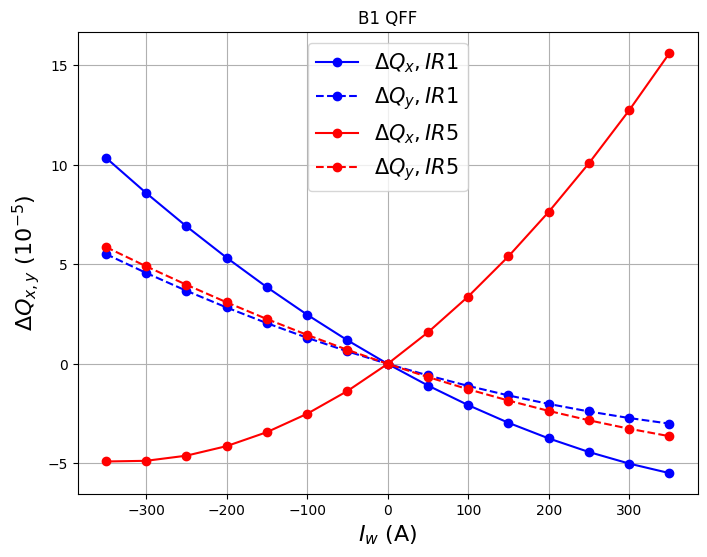

In [31]:

beam = 'b1'
# Wire distance used for both IP and both beam
#===================================================
r_w = {'b1':  {'ip1':0.009195199050594374,
               'ip5':0.012371483207783397},
       'b2':  {'ip1':0.009195200021016113,
               'ip5':0.012371484908716562}}[beam]

# Activating QFF compensation
#===================================================
tracker.vars['enable_qff'] = 1


# Going through both IPs and powering the wires
#===================================================
tuneShifts = {}
for IP in ['ip1','ip5']:
    tracker.vars[f"bbcw_rw_{IP}.{beam}"] = r_w[IP]

    #=============================================================
    #Initialize values
    tracker.vars[f"bbcw_i_ip1.{beam}"] = 0
    tracker.vars[f"bbcw_i_ip5.{beam}"] = 0

    

    # Extracting reference information
    tw = tracker.twiss()
    refQx,refQy =  tw['mux'][-1],tw['muy'][-1]

    
    # RAMPING UP CURRENT
    #=============================================================
    I_vec = np.linspace(-350,350,15)
    Qx = []
    Qy = []

    for I in (I_vec):
        # Setting current value
        tracker.vars[f"bbcw_i_{IP}.{beam}"] = I
        
        # Measuring Tune
        _twiss = tracker.twiss()
        _Qx,_Qy =  _twiss['mux'][-1],_twiss['muy'][-1]

        Qx.append(_Qx)
        Qy.append(_Qy)
        

    # Saving results:
    tuneShifts[(IP,'x')] = np.array(Qx)-refQx
    tuneShifts[(IP,'y')] = np.array(Qy)-refQy

    
# Plotting
#===================================================
plt.figure(figsize=(8,6))
plt.title(f'{beam.upper()} QFF')
for IP,color in zip(['ip1','ip5'],['b','r']):
    plt.plot(I_vec,tuneShifts[(IP,'x')]/1e-5,'-o',color=color,label=rf'$\Delta Q_x, IR{IP[-1]}$')
    plt.plot(I_vec,tuneShifts[(IP,'y')]/1e-5,'--o',color=color,label=rf'$\Delta Q_y, IR{IP[-1]}$')

plt.grid(True)
plt.xlabel(r'$I_w$ (A)',fontsize=16)
plt.ylabel(r'$\Delta Q_{x,y}$ ($10^{-5}$)',fontsize=16)
plt.legend(fontsize=15)



name <class 'tuple'>
s <class 'numpy.ndarray'>
x <class 'numpy.ndarray'>
px <class 'numpy.ndarray'>
y <class 'numpy.ndarray'>
py <class 'numpy.ndarray'>
zeta <class 'numpy.ndarray'>
delta <class 'xobjects.context_cpu.LinkedArrayCpu'>
ptau <class 'xobjects.context_cpu.LinkedArrayCpu'>
betx <class 'numpy.ndarray'>
bety <class 'numpy.ndarray'>
alfx <class 'numpy.ndarray'>
alfy <class 'numpy.ndarray'>
gamx <class 'numpy.ndarray'>
gamy <class 'numpy.ndarray'>
dx <class 'xobjects.context_cpu.LinkedArrayCpu'>
dpx <class 'xobjects.context_cpu.LinkedArrayCpu'>
dy <class 'xobjects.context_cpu.LinkedArrayCpu'>
dpy <class 'xobjects.context_cpu.LinkedArrayCpu'>
mux <class 'numpy.ndarray'>
muy <class 'numpy.ndarray'>
qx <class 'numpy.float64'>
qy <class 'numpy.float64'>
qs <class 'numpy.float64'>
dqx <class 'numpy.float64'>
dqy <class 'numpy.float64'>
slip_factor <class 'numpy.float64'>
momentum_compaction_factor <class 'numpy.float64'>
betz0 <class 'numpy.float64'>
circumference <class 'numpy.float

In [16]:
tw.keys()

dict_keys(['name', 's', 'x', 'px', 'y', 'py', 'zeta', 'delta', 'ptau', 'betx', 'bety', 'alfx', 'alfy', 'gamx', 'gamy', 'dx', 'dpx', 'dy', 'dpy', 'mux', 'muy', 'qx', 'qy', 'qs', 'dqx', 'dqy', 'slip_factor', 'momentum_compaction_factor', 'betz0', 'circumference', 'T_rev', 'R_matrix', 'particle_on_co'])